In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리

* Pandas를 사용하여 Titanic 데이터를 불러오고 결측치 처리 및 필요 없는 열 제거.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#표준편차(std)의 3배가 넘어가면 이상값이 있는것이다"라고 생각

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.isna().sum() /len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Age과, Cabin, Embarked에 결측값이 발견되어 처리

In [8]:
# 최빈값으로 대치하기  :mode - 전체 데이터에서 가장 많은 값으로 대체

In [9]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [10]:
data['Age'] = data['Age'].fillna(24.0)

cabin 컬럼은 결측값 비율이 77%라서 삭제

In [11]:
data= data.drop('Cabin', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
# 명목형 자료, 범주형 자료
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
data['Embarked'] = data['Embarked'].fillna('S')

# EDA 및 Feature Engineering

* 각 변수의 분포 및 상관관계 분석.
* 필요한 경우 새로운 피처 생성 및 기존 피처 변환.

범주형 자료를 숫자로 변환하기

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
#일단 삭제해줄 아이들 골라내기 -> 이름(사용안되니), 케빈(결측치 많아서), 티켓은 일단 두기?

In [19]:
data = data.drop(['Name'], axis=1)
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [20]:
#티켓은 결측치가 없지만 분석할만있는게 있는지 확인해보기
data['Ticket'].nunique()

681

In [21]:
#너무 많이 범주화 불가할 것-> 삭제
data.drop('Ticket', axis=1, inplace=True)

In [22]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


성별 컬럼을 숫자로 변환하기

# label encoder를 사용해 범주형 변수 변환하기

* from sklearn.preprocessing import LabelEncoder 임포트

* le = LabelEncoder() 레이블 인코더 인스턴스 생성

* data['Sex'] = le.fit_transform(data['Sex']) Sex 컬럼안에 있는 카테고리 male과 female이 숫자 0, 1로 변환

* le.inverse_transform([변환할 숫자]) 숫자로 변환된 것을 다시 문자로 되돌리고 싶을 때

* 변환할 카테고리 변수 수 만큼 인스턴스를 생성해야 나중에 복원 가능

* le => sex 컬럼

* le2 => embarked 컬럼

In [24]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le2 = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le2.fit_transform(data['Embarked'])

In [25]:

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# 변수간에 상관관계 분석하기

In [26]:
data_corr = data.corr(method='spearman')
data_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.034091,0.042939,0.044744,-0.061161,0.001235,-0.013975,0.018105
Survived,-0.005007,1.000000,-0.339668,-0.543351,-0.023764,0.088879,0.138266,0.323736,-0.160196
Pclass,-0.034091,-0.339668,1.000000,0.135775,-0.338558,-0.043019,-0.022801,-0.688032,0.091977
Sex,0.042939,-0.543351,0.135775,1.000000,0.065579,-0.195204,-0.254512,-0.259593,0.115412
Age,0.044744,-0.023764,-0.338558,0.065579,1.000000,-0.135842,-0.209949,0.142980,0.030686
SibSp,-0.061161,0.088879,-0.043019,-0.195204,-0.135842,1.000000,0.450014,0.447113,0.011157
Parch,0.001235,0.138266,-0.022801,-0.254512,-0.209949,0.450014,1.000000,0.410074,0.028365
Fare,-0.013975,0.323736,-0.688032,-0.259593,0.142980,0.447113,0.410074,1.000000,-0.074873
Embarked,0.018105,-0.160196,0.091977,0.115412,0.030686,0.011157,0.028365,-0.074873,1.000000


In [27]:

le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [28]:

le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

<Axes: >

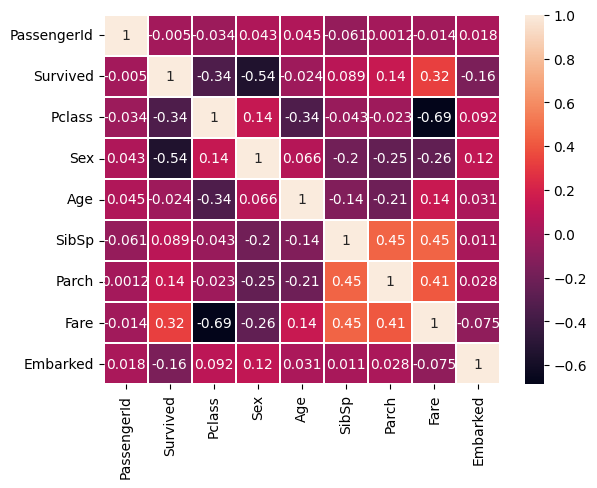

In [29]:
import seaborn as sns
sns.heatmap(data_corr, annot=True, linewidths=0.2 )

# 각 컬럼별 데이터 분포 파악 및 시각화

In [30]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [31]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

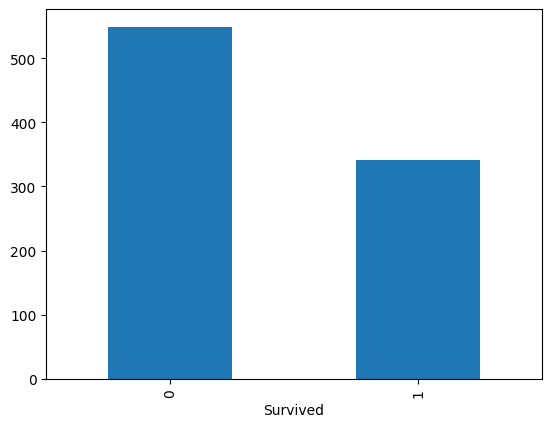

In [32]:
data['Survived'].value_counts().plot(kind='bar')

In [33]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

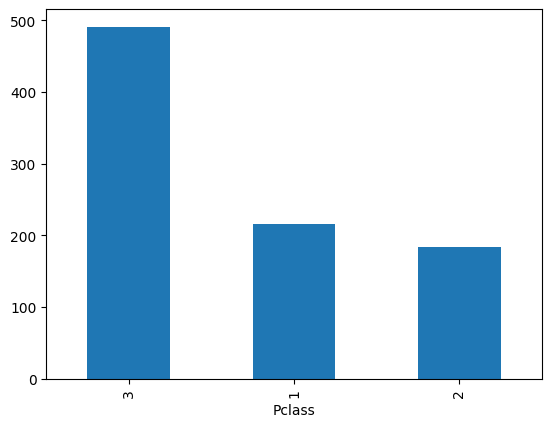

In [34]:
data['Pclass'].value_counts().plot(kind='bar')

In [35]:
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

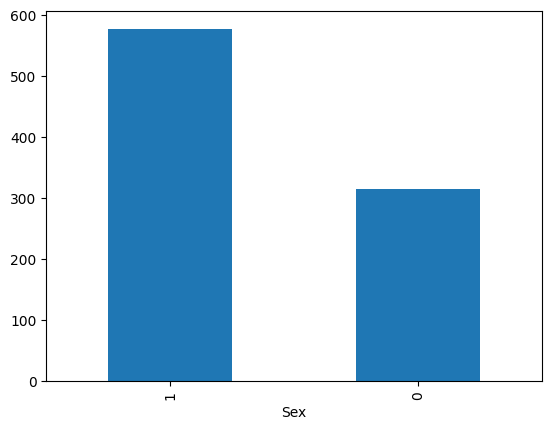

In [36]:
data['Sex'].value_counts().plot(kind='bar')

In [37]:
data['Age'].value_counts()

Age
24.00    207
22.00     27
18.00     26
28.00     25
30.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

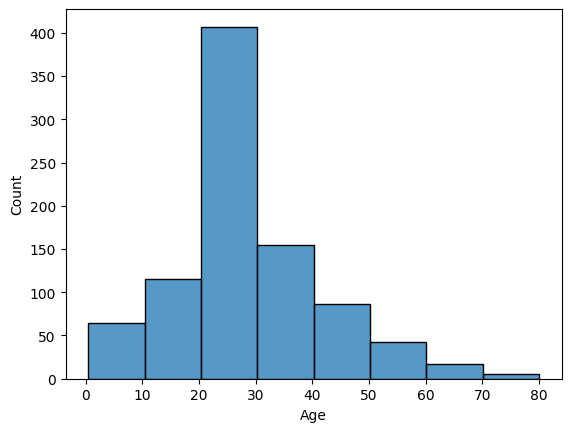

In [38]:
sns.histplot(data['Age'], bins=8)

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [40]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

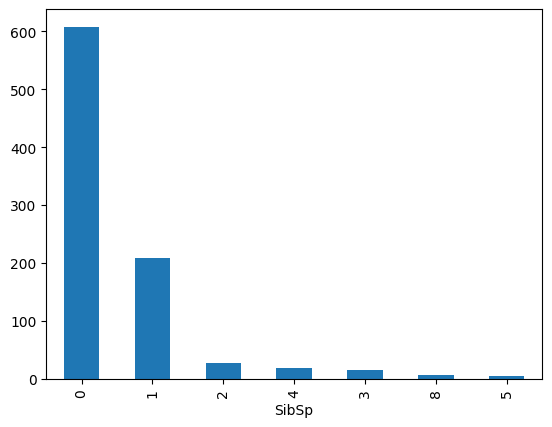

In [41]:
data['SibSp'].value_counts().plot(kind='bar')

In [42]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

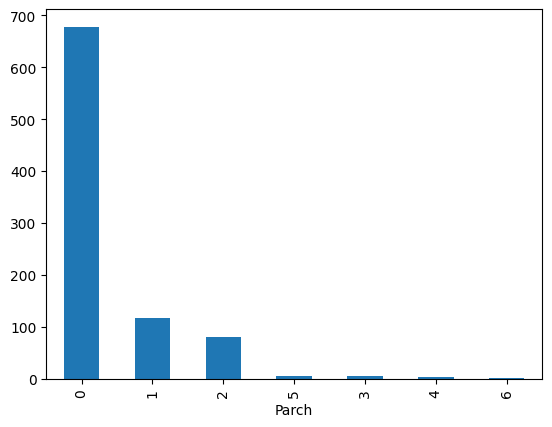

In [43]:
data['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

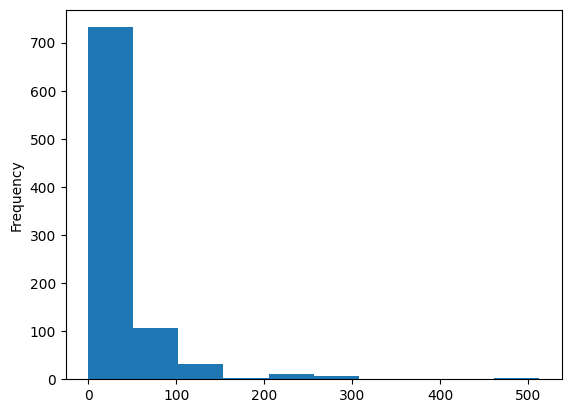

In [44]:
data['Fare'].plot(kind='hist')

<Axes: xlabel='Fare', ylabel='Count'>

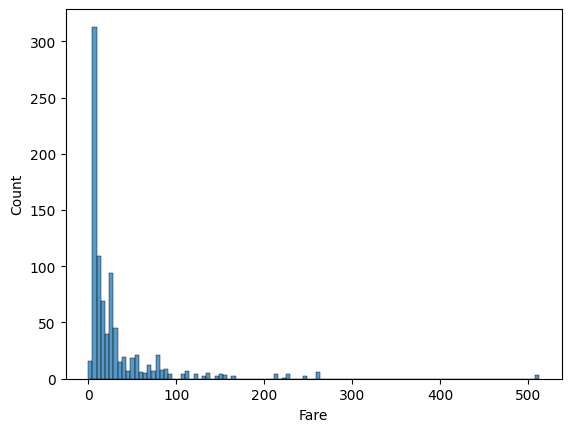

In [45]:
sns.histplot(data['Fare'])

In [46]:
data['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

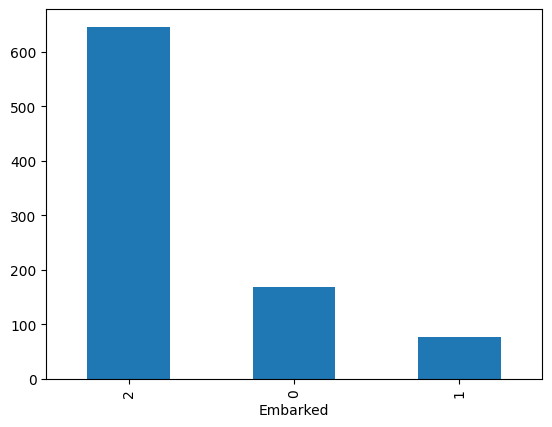

In [47]:
data['Embarked'].value_counts().plot(kind='bar')

In [48]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

## groupby로 독립변수와 종속변수간 규칙 찾기

In [49]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [50]:
data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

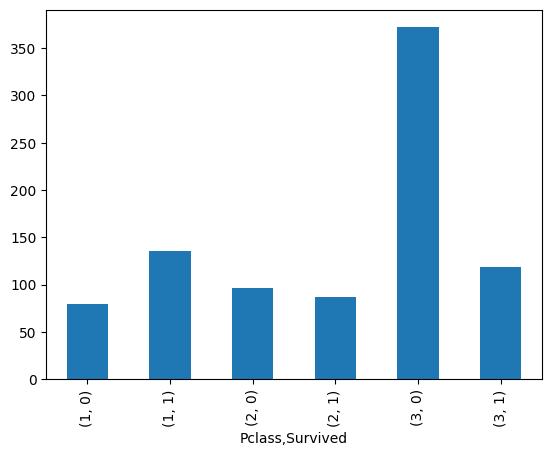

In [51]:
data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False).plot(kind='bar')

* Pclass가 1인 경우 생존이 사망보다 많음
* Pclass가 2인 경우 사망이 생존보다 많음
* Pclass가 3인 경우 사망이 생존보다 월등히 많음

In [52]:
data[['Survived', 'Sex']].groupby('Sex').value_counts(sort=False)

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: count, dtype: int64

<Axes: xlabel='Sex,Survived'>

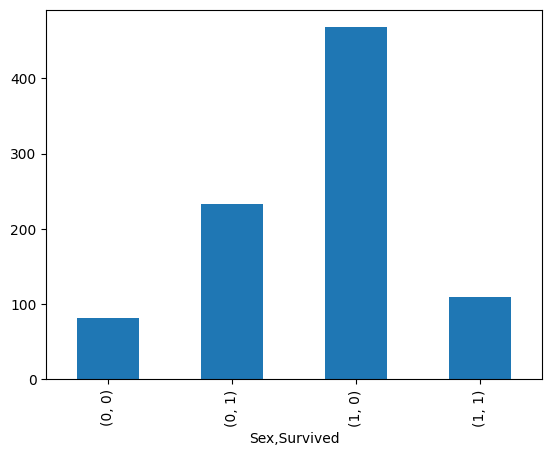

In [53]:
data[['Survived', 'Sex']].groupby('Sex').value_counts(sort=False).plot(kind='bar')

In [54]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

* 성별이 여성인 경우 생존율이 높음
* 성별이 남성인 경우 사망율이 높음

In [55]:
data[['SibSp', 'Survived']].groupby('SibSp').value_counts(sort=False)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

<Axes: xlabel='SibSp,Survived'>

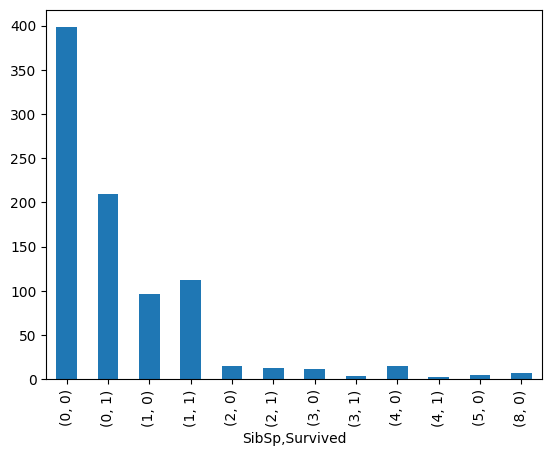

In [56]:
data[['SibSp', 'Survived']].groupby('SibSp').value_counts(sort=False).plot(kind='bar')

In [57]:
data[['Parch', 'Survived']].groupby('Parch').value_counts(sort=False)

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

<Axes: xlabel='Parch,Survived'>

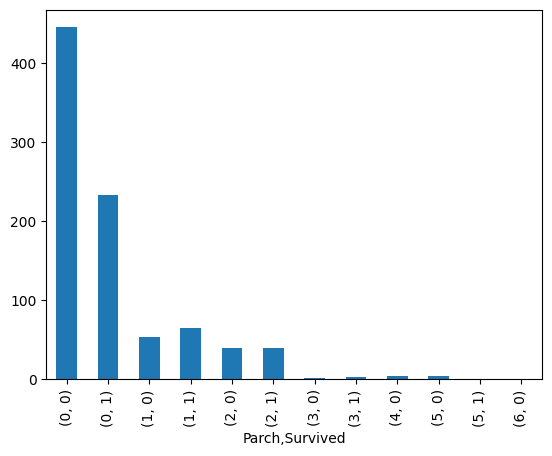

In [58]:
data[['Parch', 'Survived']].groupby('Parch').value_counts(sort=False).plot(kind='bar')

In [59]:
data.groupby('Embarked')['Survived'].value_counts(sort=False)

Embarked  Survived
0         0            75
          1            93
1         0            47
          1            30
2         0           427
          1           219
Name: count, dtype: int64

<Axes: xlabel='Embarked,Survived'>

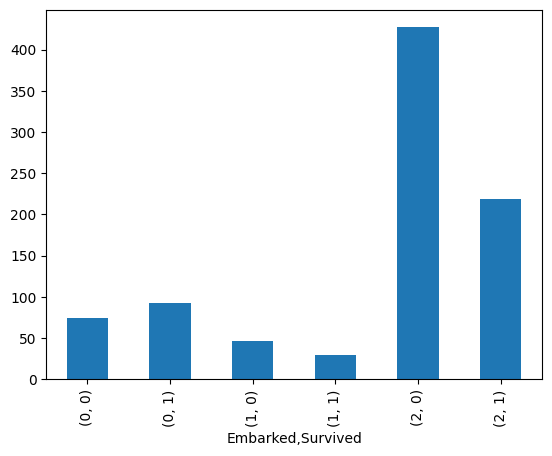

In [60]:
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

In [61]:
le2.inverse_transform([0, 1, 2])

array(['C', 'Q', 'S'], dtype=object)

## 연속형 데이터인 경우 구간화를 통해서 명목변수로 변환


* 조건문으로 Age 컬럼 구간화 하기

In [62]:
data['Age'].max()

80.0

In [63]:

def ages(x):
    if 0 < x < 10:
        return "under10"
    elif 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "60s"
    elif 70 <= x < 80:
        return "70s"
    elif 80 <= x < 90:
        return "80s"


In [64]:
data['Age'] = data['Age'].apply(ages)

In [65]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,20s,1,0,7.2500,2
1,2,1,1,0,30s,1,0,71.2833,0
2,3,1,3,0,20s,0,0,7.9250,2
3,4,1,1,0,30s,1,0,53.1000,2
4,5,0,3,1,30s,0,0,8.0500,2


<Axes: xlabel='Age,Survived'>

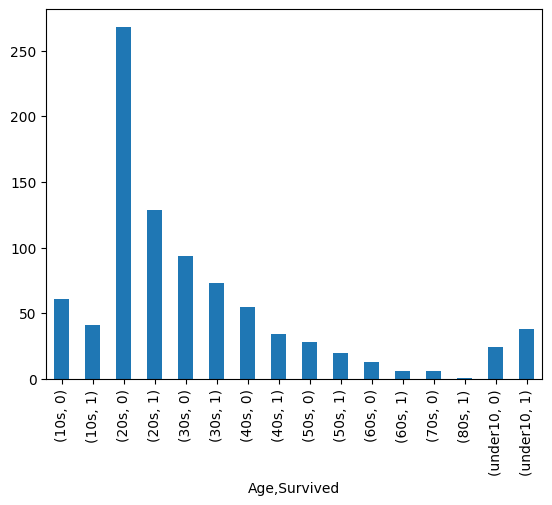

In [66]:
data[['Age','Survived']].groupby('Age').value_counts(sort=False).plot(kind='bar')

In [67]:
data[['Age','Survived']].groupby('Age').value_counts(sort=False)

Age      Survived
10s      0            61
         1            41
20s      0           268
         1           129
30s      0            94
         1            73
40s      0            55
         1            34
50s      0            28
         1            20
60s      0            13
         1             6
70s      0             6
80s      1             1
under10  0            24
         1            38
Name: count, dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


### pclass별, 성별별, 생존율

In [69]:
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(sort=False)

Pclass  Sex  Survived
1       0    0             3
             1            91
        1    0            77
             1            45
2       0    0             6
             1            70
        1    0            91
             1            17
3       0    0            72
             1            72
        1    0           300
             1            47
Name: count, dtype: int64

<Axes: xlabel='Pclass,Sex,Survived'>

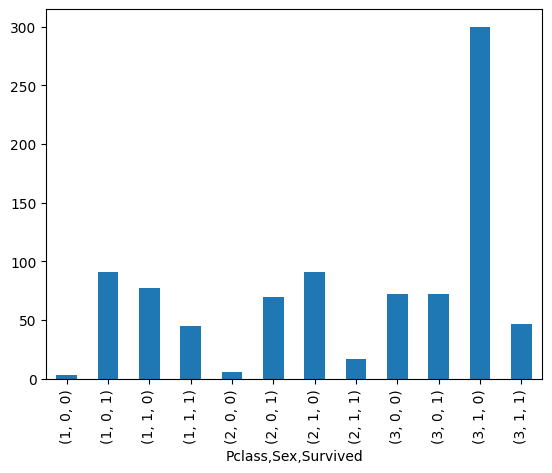

In [70]:
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(sort=False).plot(kind='bar')

### pclass별, 성별별, 나이별 생존율

In [71]:
data[['Pclass', 'Sex', 'Age', 'Survived']].groupby(['Pclass', 'Sex', 'Age']).value_counts(sort=False)

Pclass  Sex  Age      Survived
1       0    10s      1           13
             20s      0            1
                      1           24
             30s      1           27
             40s      1           13
                                  ..
3       1    50s      0            6
             60s      0            2
             70s      0            2
             under10  0           13
                      1            8
Name: count, Length: 70, dtype: int64

In [72]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,20s,1,0,7.2500,2
1,2,1,1,0,30s,1,0,71.2833,0
2,3,1,3,0,20s,0,0,7.9250,2
3,4,1,1,0,30s,1,0,53.1000,2
4,5,0,3,1,30s,0,0,8.0500,2


In [73]:
data = data.drop('Fare', axis=1)
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,20s,1,0,2
1,2,1,1,0,30s,1,0,0


# Feature Engineering ( 변수 선택, 새로운 변수 생성)

In [74]:
data['Family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,1,0,3,1,20s,1,0,2,1
1,2,1,1,0,30s,1,0,0,1
2,3,1,3,0,20s,0,0,2,0
3,4,1,1,0,30s,1,0,2,1
4,5,0,3,1,30s,0,0,2,0


In [75]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,1,20s,2,1
1,2,1,1,0,30s,0,1
2,3,1,3,0,20s,2,0
3,4,1,1,0,30s,2,1
4,5,0,3,1,30s,2,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    int32 
 4   Age          891 non-null    object
 5   Embarked     891 non-null    int32 
 6   Family       891 non-null    int64 
dtypes: int32(2), int64(4), object(1)
memory usage: 41.9+ KB


# 카테고리 변수의 더미변수화 get_dummies

In [77]:
data = pd.get_dummies(data, columns=['Sex','Age','Embarked','Family'], drop_first=True)

In [78]:
data.head()

,PassengerId,Survived,Pclass,Sex_1,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,...,Embarked_1,Embarked_2,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,1,0,3,True,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,2,1,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,1,3,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,5,0,3,True,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex_1        891 non-null    bool 
 4   Age_20s      891 non-null    bool 
 5   Age_30s      891 non-null    bool 
 6   Age_40s      891 non-null    bool 
 7   Age_50s      891 non-null    bool 
 8   Age_60s      891 non-null    bool 
 9   Age_70s      891 non-null    bool 
 10  Age_80s      891 non-null    bool 
 11  Age_under10  891 non-null    bool 
 12  Embarked_1   891 non-null    bool 
 13  Embarked_2   891 non-null    bool 
 14  Family_1     891 non-null    bool 
 15  Family_2     891 non-null    bool 
 16  Family_3     891 non-null    bool 
 17  Family_4     891 non-null    bool 
 18  Family_5     891 non-null    bool 
 19  Family_6     891 non-null    bool 
 20  Family_7  

# 데이터 증폭 (SMOTE 사용)

불균형 클래스 문제 해결을 위해

In [88]:
# !pip install imbalanced-learn xgboost scikit-learn


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [84]:
# 1. 종속 변수와 독립 변수 분리
X = data.drop('Survived', axis=1)  # 피처 (독립 변수)
y = data['Survived']               # 타겟 변수 (종속 변수)

# 2. 학습용 데이터와 테스트 데이터를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 4. SMOTE 적용 후 데이터 분포 확인
print("원래 데이터 분포:\n", y_train.value_counts())
print("SMOTE 후 데이터 분포:\n", y_resampled.value_counts())



원래 데이터 분포:
 Survived
0    444
1    268
Name: count, dtype: int64
SMOTE 후 데이터 분포:
 Survived
0    444
1    444
Name: count, dtype: int64


In [85]:
# 4. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression 결과:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression 결과:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       105
           1       0.72      0.78      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [86]:
# 5. RandomForest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

print("RandomForest 결과:\n", classification_report(y_test, y_pred_rf))


RandomForest 결과:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [89]:
# 6. XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost 결과:\n", classification_report(y_test, y_pred_xgb))

XGBoost 결과:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



C:\Users\5-06\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 4. 결과 해석
* 정밀도(Precision): 모델이 긍정 클래스로 예측한 값 중 실제로 긍정인 값의 비율.
* 재현율(Recall): 실제 긍정 클래스 중 모델이 긍정으로 잘 예측한 값의 비율.
* F1-score: 정밀도와 재현율의 조화 평균으로, 두 지표가 균형을 이루는지 확인하는 데 사용

### 4. 모델 성능 비교:
정확도:

* RandomForest: 0.85
* XGBoost: 0.82
* Logistic Regression: 0.79
* RandomForest가 가장 높은 정확도를 기록했습니다.<br>

정밀도:

* 클래스 0과 1 모두에서 RandomForest가 우수한 정밀도를 기록했습니다.<br>

재현율:

* 클래스 0에서는 XGBoost가 가장 높은 재현율을 보였지만, 클래스 1에서는 Logistic Regression이 가장 높습니다.<br>

F1-score:

* RandomForest는 클래스 0에서 0.87, 클래스 1에서 0.81로 가장 높은 F1-score를 기록했습니다.

결론:
* RandomForest가 가장 높은 **정확도(0.85)**와 F1-score를 기록하며, 전반적으로 가장 나은 성능을 보였습니다.
* XGBoost는 클래스 0에서 높은 재현율을 보였으나, 클래스 1에서는 다른 모델보다 낮은 성능을 보였습니다.
* Logistic Regression은 비교적 낮은 성능을 보였으며, 특히 클래스 1에서 재현율이 높은 점을 제외하고는 성능이 다른 모델보다 뒤떨어집니다.

따라서, RandomForest 모델이 이 데이터셋에서 가장 좋은 성능을 보인 것으로 평가할 수 있습니다.

# 하이퍼파라미터 튜닝으로 성능 개선하기

GridSearch와 RandomSearch의 차이
* GridSearch: 사용자가 지정한 하이퍼파라미터의 가능한 모든 조합을 시도하여 최적의 하이퍼파라미터를 찾는 방법입니다. 가능한 모든 경우의 수를 탐색하기 때문에 시간이 많이 소요될 수 있습니다.
* RandomSearch: 사용자가 설정한 횟수만큼 랜덤하게 하이퍼파라미터 조합을 선택해 튜닝을 수행합니다. 탐색 속도가 빠르고 효율적이지만, 모든 조합을 시도하지 않기 때문에 최적의 조합을 놓칠 수 있습니다.

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. RandomForest 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],   # 트리 개수
    'max_depth': [None, 10, 20, 30],   # 트리 깊이
    'min_samples_split': [2, 5, 10],   # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]      # 리프 노드의 최소 샘플 수
}

# 2. GridSearchCV 설정
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 3. 학습 데이터에 대해 최적의 파라미터 찾기
grid_search.fit(X_resampled, y_resampled)

# 4. 최적의 파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")

# 5. 테스트 데이터로 예측 수행 및 결과 확인
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

